# Glioblastoma Multiforme (GBM)
[Jump to the urls to download the GCT and CLS files](#Downloads)

**Authors:** Alejandra Ramos, Marylu Villa and Edwin Juarez 
**Is this what you want your scientific identity to be?**  
**Contact info:** Email Edwin at [ejuarez@cloud.ucsd.edu](mailto:ejuarez@cloud.ucsd.edu) or post a question in http://www.genepattern.org/help

This notebook provides the steps to download all the GBM samples from The Cancer Genome Atlas (TCGA) contained in the Genomic Data Commons (GDC) Data portal. These samples can be downloaded as a GCT file and phenotype labels (primary tumor vs normal samples) can be downloaded as a CLS file. These files are compatible with other GenePattern Analyses.

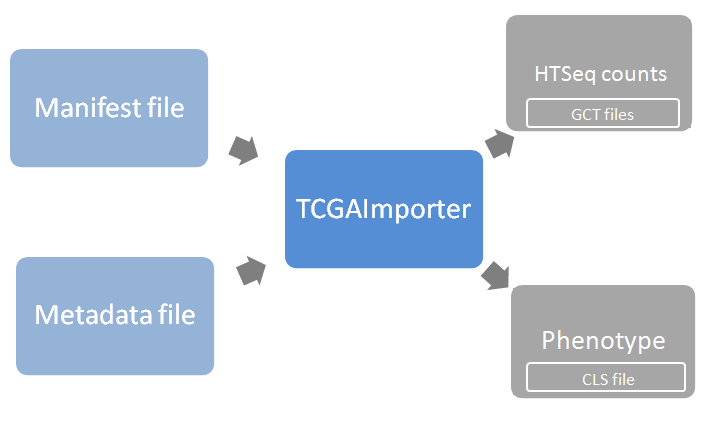

# Overview


GBM or grade IV astrocytoma, is a fast-growing, aggressive type of central nervous system tumor that forms on the supportive tissue of the brain. Glioblastoma is the most common grade IV brain cancer. Glioblastomas may appear in any lobe of the brain, but it develops more commonly in the frontal and temporal lobes. Glioblastoma usually affects adults.



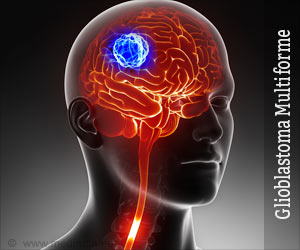

# GBM Statistics

Glioma is a general term used to describe primary brain tumors, and is classified according to their presumed cell of origin. These include astrocytic tumors (astrocytoma, anaplastic astrocytoma and glioblastoma), oligodendrogliomas, ependymomas, and mixed gliomas. (Holland., 2000; Maher et al., 2001; Schwartzbaum et al., 2006; Agnihotri et al., 2013). 

They are the most commonly occurring tumors of the central nervous system (CNS), which account for almost 80% of all malignant primary tumors of brain. Glioblastoma multiforme is the most malignant and frequently occurring type of primary astrocytomas. It accounts for more than 60% of all brain tumors in adults (Rock et al., 2014)

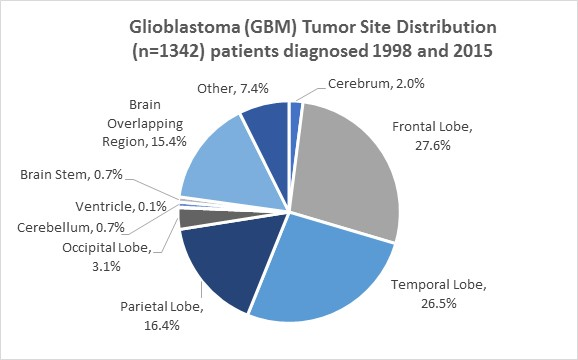
https://www.cedars-sinai.edu/Patients/Quality-Measures/Clinical-Areas/Measuring-the-Quality-of-Treatment-for-Brain-Tumors.aspx

# Dataset's Demographic information


<p>TCGA contained 159 GBM&nbsp;samples&nbsp;(154&nbsp;primary cancer samples, and 5&nbsp;normal tissue samples)&nbsp;from 166&nbsp;people. Below is a summary of the demographic information represented in this dataset. If you are interested in viewing the complete study, as well as the files on the GDC Data Portal, you can follow&nbsp;<a href="https://portal.gdc.cancer.gov/repository?facetTab=cases&amp;filters=%7B%22op%22%3A%22and%22%2C%22content%22%3A%5B%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22cases.project.project_id%22%2C%22value%22%3A%5B%22TCGA-UVM%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22files.analysis.workflow_type%22%2C%22value%22%3A%5B%22HTSeq%20-%20Counts%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22files.experimental_strategy%22%2C%22value%22%3A%5B%22RNA-Seq%22%5D%7D%7D%5D%7D&amp;searchTableTab=cases" target="_blank">this link.(these data were gathered on July 10th, 2018)</a></p>


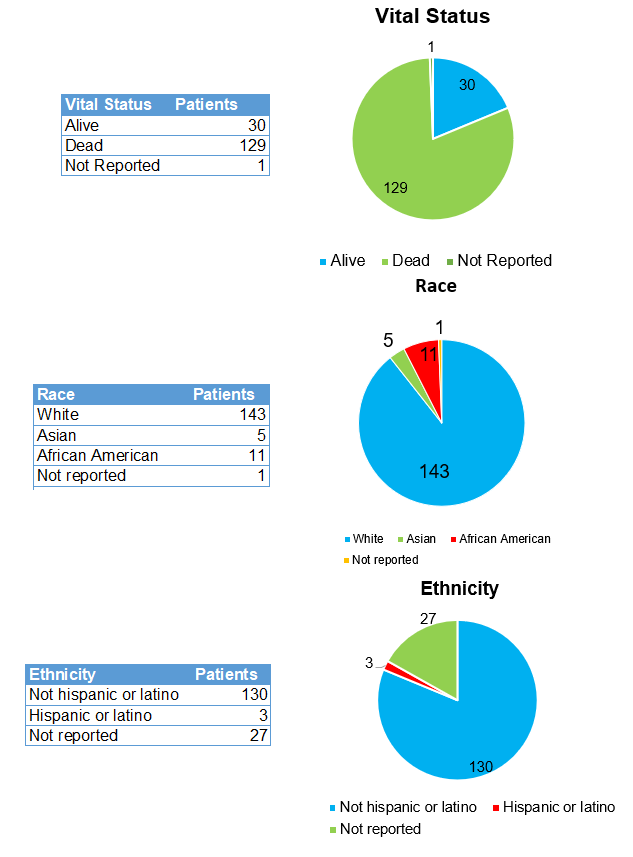

# Login to GenePattern


<div class="alert alert-info">
<h3 style="margin-top: 0;"> Instructions <i class="fa fa-info-circle"></i></h3>

<ol>
    <li>Login to the *GenePattern Cloud* server.</li>
</ol>

</div>

In [25]:
# Requires GenePattern Notebook: pip install genepattern-notebook
import gp
import genepattern

# Username and password removed for security reasons.
genepattern.display(genepattern.session.register("https://cloud.genepattern.org/gp", "", ""))

GPAuthWidget()

# Downloading RNA-Seq HTSeq Counts Using TCGAImporter

Use the TCGAImporter module to download RNA-Seq HTSeq counts from the GDC Data Portal using a Manifest file and a Metadata file

<p><strong>Input files</strong></p>

<ul>
	<li><em>Manifest file</em>: a file containing the list of RNA-Seq samples to be downloaded.</li>
	<li><em>Metadata file</em>: a file containing information about the files present at the GDC Data Portal. Instructions for downloading the Manifest and Metadata files can be found here: <a href="https://github.com/genepattern/TCGAImporter/blob/master/how_to_download_a_manifest_and_metadata.pdf" target="_blank">https://github.com/genepattern/TCGAImporter/blob/master/how_to_download_a_manifest_and_metadata.pdf</a></li>
</ul>

<p><strong>Output files</strong></p>

<ul>
	<li><em>GBM_TCGA.gct</em> - This is a tab delimited file that contains the gene expression&nbsp;(HTSeq&nbsp;counts) from the samples listed on the Manifest file. For more info on GCT files, look at reference <a href="#References">1</a><em> </em></li>
	<li><em><em>GBM_TCGA.cls</em> -</em> The CLS file defines phenotype labels (in this case Primary Tumor and Normal Sample) and associates each sample in the GCT file with a label. For more info on CLS files, look at reference <a href="#References">2</a></li>
</ul>


<div class="alert alert-info">
<h3 style="margin-top: 0;"> Instructions <i class="fa fa-info-circle"></i></h3>

<ol>
    <li>Load the manifest file in **Manifest** parameter.</li>
    <li>Load the metadata file in **Metadata** parameter.</li>
    <li>Click **run**.</li>
</ol>

</div>

<p><strong>Estimated run time for TCGAImporter</strong> : ~ 2 minutes</p>


In [29]:
tcgaimporter_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00369')
tcgaimporter_job_spec = tcgaimporter_task.make_job_spec()
tcgaimporter_job_spec.set_parameter("manifest", "https://cloud.genepattern.org/gp/users/marylu257/tmp/run3113277736914705540.tmp/GBM_manifest.txt")
tcgaimporter_job_spec.set_parameter("metadata", "https://cloud.genepattern.org/gp/users/marylu257/tmp/run8285369716930610879.tmp/GBM_metadata.json")
tcgaimporter_job_spec.set_parameter("output_file_name", "GBM_TCGA")
tcgaimporter_job_spec.set_parameter("gct", "True")
tcgaimporter_job_spec.set_parameter("translate_gene_id", "False")
tcgaimporter_job_spec.set_parameter("cls", "True")
genepattern.display(tcgaimporter_task)

job35195 = gp.GPJob(genepattern.session.get(0), 35195)
genepattern.display(job35195)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00369')

GPJobWidget(job_number=31604)

In [30]:
collapsedataset_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00134')
collapsedataset_job_spec = collapsedataset_task.make_job_spec()
collapsedataset_job_spec.set_parameter("dataset.file", "https://cloud.genepattern.org/gp/jobResults/31604/TCGA_dataset.gct")
collapsedataset_job_spec.set_parameter("chip.platform", "ftp://ftp.broadinstitute.org/pub/gsea/annotations/ENSEMBL_human_gene.chip")
collapsedataset_job_spec.set_parameter("collapse.mode", "Maximum")
collapsedataset_job_spec.set_parameter("output.file.name", "<dataset.file_basename>.collapsed")
genepattern.display(collapsedataset_task)


job32403 = gp.GPJob(genepattern.session.get(0), 32403)
genepattern.display(job32403)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00134')

GPJobWidget(job_number=32403)

# Downloads


<p>You can download the input and output files of TCGAImporter for this cancer type here:</p>

<p><strong>Inputs:</strong></p>

<ul>
	<li><a href="https://datasets.genepattern.org/data/TCGA_HTSeq_counts/KIRP/KIRP_MANIFEST.txt" target="_blank">https://datasets.genepattern.org/data/TCGA_HTSeq_counts/GBM/GBM_MANIFEST.txt</a></li>
	<li><a href="https://datasets.genepattern.org/data/TCGA_HTSeq_counts/KIRP/KIRP_METADATA.json" target="_blank">https://datasets.genepattern.org/data/TCGA_HTSeq_counts/GBM/GBM_METADATA.json</a></li>
</ul>

<p><strong>Outputs:</strong></p>

<ul>
	<li><a href="https://datasets.genepattern.org/data/TCGA_HTSeq_counts/KIRP/KIRP_TCGA.gct" target="_blank">https://datasets.genepattern.org/data/TCGA_HTSeq_counts/GBM/GBM_TCGA.gct</a></li>
	<li><a href="https://datasets.genepattern.org/data/TCGA_HTSeq_counts/KIRP/KIRP_TCGA.cls" target="_blank">https://datasets.genepattern.org/data/TCGA_HTSeq_counts/GBM/GBM_TCGA.cls</a></li>
</ul>


If you'd like to download similar files for other TCGA datasets, visit this link: 
- https://datasets.genepattern.org/?prefix=data/TCGA_HTSeq_counts/

# References

[1] http://software.broadinstitute.org/cancer/software/genepattern/file-formats-guide#GCT

[2] http://software.broadinstitute.org/cancer/software/genepattern/file-formats-guide#CLS

[3] http://www.aans.org/Patients/Neurosurgical-Conditions-and-Treatments/Glioblastoma-Multiforme&nbsp;</p>

[4] https://www.cancercenter.com/brain-cancer/types/tab/glioblastoma-multiforme/&nbsp;</p>

[5] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5563115/</p>
